In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from scipy.stats import pearsonr
df=pd.read_csv("OneDrive\Desktop/dataset2.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,Total Fuel Consumption(MPG),CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,31,212


In [52]:
df.isnull().sum()


MODELYEAR                      0
MAKE                           0
MODEL                          0
VEHICLECLASS                   0
ENGINESIZE                     0
CYLINDERS                      0
TRANSMISSION                   0
FUELTYPE                       0
Total Fuel Consumption(MPG)    0
CO2EMISSIONS                   0
dtype: int64

In [53]:
x=df['ENGINESIZE'];y=df['CO2EMISSIONS']

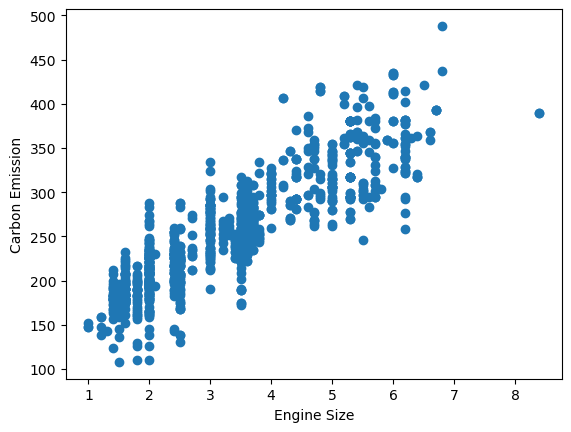

Pearsons correlation: 0.874


In [54]:
plt.scatter(x,y)
plt.xlabel('Engine Size')
plt.ylabel('Carbon Emission')
plt.show()
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

In [55]:
def estimate_coef(x, y):
    t1=t2=0
    mx=(sum(x)/len(x))
    my=(sum(y)/len(y))
    for i in range(len(x)):
        t1+= (x[i]-mx)*(y[i]-my)
        t2+= (x[i]-mx)**2
        w1=t1/t2
        '''if any([t1,t2])==0:
            w1=0.0
        else:
            w1=t1/t2'''
        w0=my-w1*mx

    return (w0, w1)

In [56]:
def plot_regression_line(X,y, w):
    
    pred=[]
    for x in X:
        y1=w[0]+w[1]*x
        pred.append(y1)
    

    #Plotting Regression Line
    plt.scatter(X,y, color="blue")
    plt.plot(X,pred, color='red')
    plt.ylabel('CO2 Emission')
    plt.xlabel('Engine Size')
    plt.title('LINEAR REGRESSION PLOT')
    plt.show()  
    mabe= round(metrics.median_absolute_error(y,pred), 8)
    mse= round(metrics.mean_squared_error(y,pred), 8)
    mae= round(metrics.mean_absolute_error(y,pred), 8)
    r2= round(metrics.r2_score(y,pred)*100, 2)
    return pd.DataFrame(data=[['Accuracy',r2],['Mean Absolute Error',mae],['Mean Squared Error',mse],['Median Absolute Error',mabe]],
                        columns=['Metrics','Values'])

Train set size:  853 
Test set size 214
Estimated coefficients:
W0 = 126.1456139655325 
W1 = 38.88026675358381


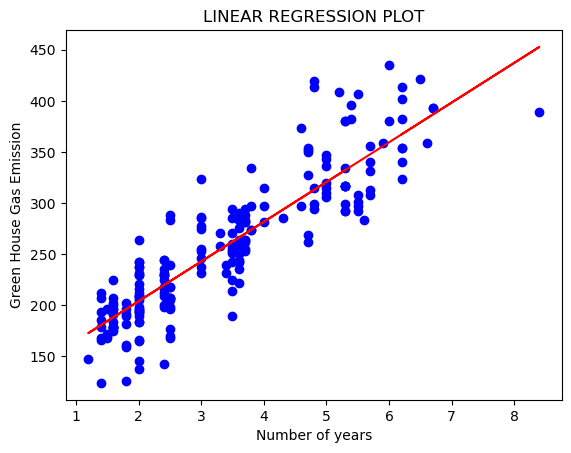

,Metrics,Values
0,Accuracy,79.170000
1,Mean Absolute Error,23.541652
2,Mean Squared Error,964.493889
3,Median Absolute Error,16.000000


In [57]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=2)
print('Train set size: ',len(X_train),'\nTest set size',len(X_test))


w = estimate_coef(list(X_train), list(y_train))
print("Estimated coefficients:\nW0 = {} \
\nW1 = {}".format(w[0], w[1]))

d=plot_regression_line(X_test, y_test, w)
d